In [1]:
! nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import time
import re

#### 데이터 불러오기 (pos 및 특수문자 등 정제된 데이터임. 정제 방법은 깃허브 코드 참고)
#### https://github.com/Ryleyun91/Ryles_Practice/tree/main/DACON

In [4]:
### 데이터 불러오기 (정제 안 된 것)
PATH = '..'
PATH = '/content/drive/MyDrive/Github/Ryles_Practice'
train_pos = pd.read_csv(PATH + "/DATA/open/train_pos.csv")
test_pos = pd.read_csv(PATH + "/DATA/open/test_pos.csv")

In [5]:
train_name_key = [str(sent) for sent in train_pos['과제명'] + " " + train_pos['요약문_한글키워드']]
train_goal = [str(sent) for sent in train_pos['요약문_연구목표']]
train_cont = [str(sent) for sent in train_pos['요약문_연구내용']]
train_effect = [str(sent) for sent in train_pos['요약문_기대효과']]
test_name_key = [str(sent) for sent in test_pos['과제명'] + " " + test_pos['요약문_한글키워드']]
test_goal = [str(sent) for sent in test_pos['요약문_연구목표']]
test_cont = [str(sent) for sent in test_pos['요약문_연구내용']]
test_effect = [str(sent) for sent in test_pos['요약문_기대효과']]
train_label = [int(str(answer)) for answer in train_pos['label']]

In [6]:
# EDA
train_name_key_len = [len(str(sent)) for sent in train_name_key]
train_goal_len = [len(str(sent)) for sent in train_goal]
train_cont_len = [len(str(sent)) for sent in train_cont]
train_effect_len = [len(str(sent)) for sent in train_effect]
test_name_key_len = [len(str(sent)) for sent in test_name_key]
test_goal_len = [len(str(sent)) for sent in test_goal]
test_cont_len = [len(str(sent)) for sent in test_cont]
test_effect_len = [len(str(sent)) for sent in test_effect]

(array([2.0480e+03, 1.8166e+04, 1.8507e+04, 4.3470e+03, 4.4200e+02,
        5.4000e+01, 8.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  3. ,  35.7,  68.4, 101.1, 133.8, 166.5, 199.2, 231.9, 264.6,
        297.3, 330. ]),
 <a list of 10 Patch objects>)

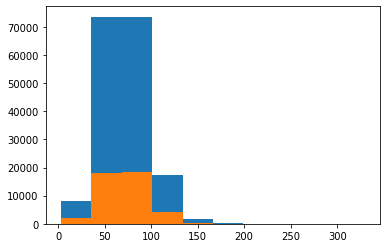

In [7]:
# name_key
import matplotlib.pyplot as plt
plt.hist(train_name_key_len)
plt.hist(test_name_key_len)

## max_len 140정도 주면 커버될 듯

(array([3.263e+04, 8.976e+03, 1.519e+03, 3.130e+02, 9.700e+01, 3.500e+01,
        2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([3.0000e+00, 3.7570e+02, 7.4840e+02, 1.1211e+03, 1.4938e+03,
        1.8665e+03, 2.2392e+03, 2.6119e+03, 2.9846e+03, 3.3573e+03,
        3.7300e+03]),
 <a list of 10 Patch objects>)

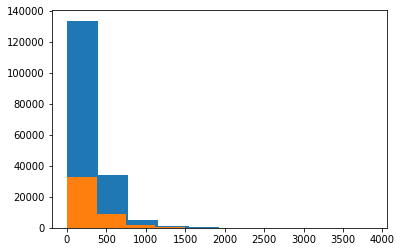

In [8]:
# goal
plt.hist(train_goal_len)
plt.hist(test_goal_len)

## max_len 800정도 주면 커버될 듯

(array([1.4177e+04, 1.4778e+04, 8.1720e+03, 4.2160e+03, 1.6770e+03,
        4.5500e+02, 8.1000e+01, 1.0000e+01, 3.0000e+00, 7.0000e+00]),
 array([3.0000e+00, 3.5740e+02, 7.1180e+02, 1.0662e+03, 1.4206e+03,
        1.7750e+03, 2.1294e+03, 2.4838e+03, 2.8382e+03, 3.1926e+03,
        3.5470e+03]),
 <a list of 10 Patch objects>)

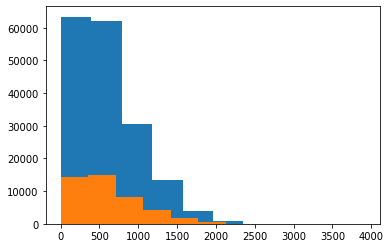

In [9]:
# cont
plt.hist(train_cont_len)
plt.hist(test_cont_len)

## max_len 1500정도 주면 커버될 듯

(array([1.9381e+04, 1.5866e+04, 5.9250e+03, 1.3860e+03, 5.8700e+02,
        2.6300e+02, 8.6000e+01, 6.5000e+01, 1.5000e+01, 2.0000e+00]),
 array([   3. ,  266.7,  530.4,  794.1, 1057.8, 1321.5, 1585.2, 1848.9,
        2112.6, 2376.3, 2640. ]),
 <a list of 10 Patch objects>)

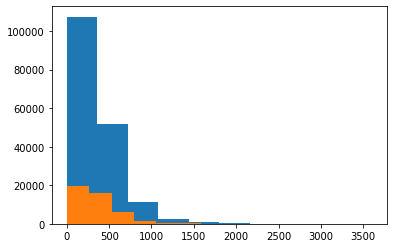

In [10]:
# effect
plt.hist(train_effect_len)
plt.hist(test_effect_len)

## max_len 1000정도 주면 커버될 듯

In [11]:
train_name_cont_key = [str(sent) for sent in train_pos['과제명'] + " " + train_pos['요약문_연구내용'] + " " + train_pos['요약문_한글키워드']]
test_name_cont_key = [str(sent) for sent in test_pos['과제명'] + " " + test_pos['요약문_연구내용'] + " " + test_pos['요약문_한글키워드']]

(array([1.1230e+04, 1.5522e+04, 9.4180e+03, 4.8190e+03, 1.9530e+03,
        5.1500e+02, 9.7000e+01, 1.1000e+01, 5.0000e+00, 6.0000e+00]),
 array([3.0000e+00, 3.6560e+02, 7.2820e+02, 1.0908e+03, 1.4534e+03,
        1.8160e+03, 2.1786e+03, 2.5412e+03, 2.9038e+03, 3.2664e+03,
        3.6290e+03]),
 <a list of 10 Patch objects>)

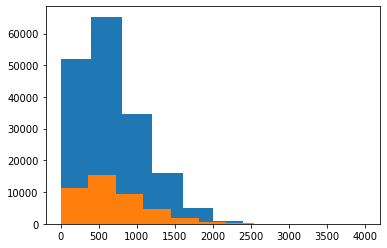

In [12]:
train_name_cont_key_len = [len(str(sent)) for sent in train_name_cont_key]
test_name_cont_key_len = [len(str(sent)) for sent in test_name_cont_key]
plt.hist(train_name_cont_key_len)
plt.hist(test_name_cont_key_len)

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Flatten, Dropout
from tensorflow.keras import layers, models
import numpy as np

In [14]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(2021)
np.random.seed(2021)

In [15]:
def CNN(train_data, test_data, maxlen, embedding_dim):
    train_data = np.array(train_data)
    test_data = np.array(test_data)
    tokenizer = Tokenizer(oov_token='<oov>')
    tokenizer.fit_on_texts(train_data)
    word_index = tokenizer.word_index
    train_seq = tokenizer.texts_to_sequences(train_data)
    test_seq = tokenizer.texts_to_sequences(test_data)
    train_pad = pad_sequences(train_seq, maxlen=maxlen, padding='post', truncating='post')
    test_pad = pad_sequences(test_seq, maxlen=maxlen, padding='post', truncating='post')
    
    vocab_size = len(word_index)+1
    dropout = 0.5
    filter_sizes = (2,3,4,5)
    num_filters = 300
    
    # Convolutional block
    input_shape=(maxlen, )
    conv_blocks = []

    model_input = keras.layers.Input(shape=input_shape)

    z = keras.layers.Embedding(vocab_size, embedding_dim, input_length=len(train_data), name="embedding")(model_input)
    z = keras.layers.Dropout(dropout)(z)
    
    for sz in filter_sizes:
        conv = keras.layers.Conv1D(filters=num_filters,
                             kernel_size=sz,
                             padding="Same",
                             activation="relu",
                             strides=1)(z)
        conv = keras.layers.MaxPooling1D(pool_size=2)(conv)
        conv = keras.layers.Flatten()(conv)
        conv_blocks.append(conv)

    z = keras.layers.Concatenate()(conv_blocks)
    z = keras.layers.Dropout(dropout)(z)
    z = keras.layers.Dense(512, activation="relu")(z)
    z = keras.layers.Dropout(dropout)(z)
    z = keras.layers.Dense(256, activation="relu")(z)
    z = keras.layers.Dropout(dropout)(z)
    model_output = keras.layers.Dense(46, activation="softmax")(z)
    model = keras.Model(model_input, model_output)
    print(model.summary())
    model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
    return model, train_pad, test_pad

In [16]:
model, train_pad, test_pad = CNN(train_name_cont_key, test_name_cont_key, 1000, 200)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1000)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1000, 200)    31557800    input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 1000, 200)    0           embedding[0][0]                  
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1000, 300)    120300      dropout[0][0]                    
______________________________________________________________________________________________

In [ ]:
model.fit(train_pad, np.array(train_label), epochs=30, batch_size=1000, validation_split=0.1, verbose=2)

Epoch 1/30


In [ ]:
answer = model.predict(test_pad)

In [ ]:
# 모델 예측
import tensorflow as tf
pred = tf.argmax(answer, axis=1)

In [ ]:
import numpy as np
np.sum(pred !=0)

In [ ]:
sample_submission=pd.read_csv(PATH + '/DATA/open/sample_submission.csv')
sample_submission['label']=pred
sample_submission.to_csv(PATH + '/DATA/Result/CNN_filter_nck.csv', index=False)